## The goal is to predict the survival of passengers travelling in RMS Titanic using Logistic Regression.

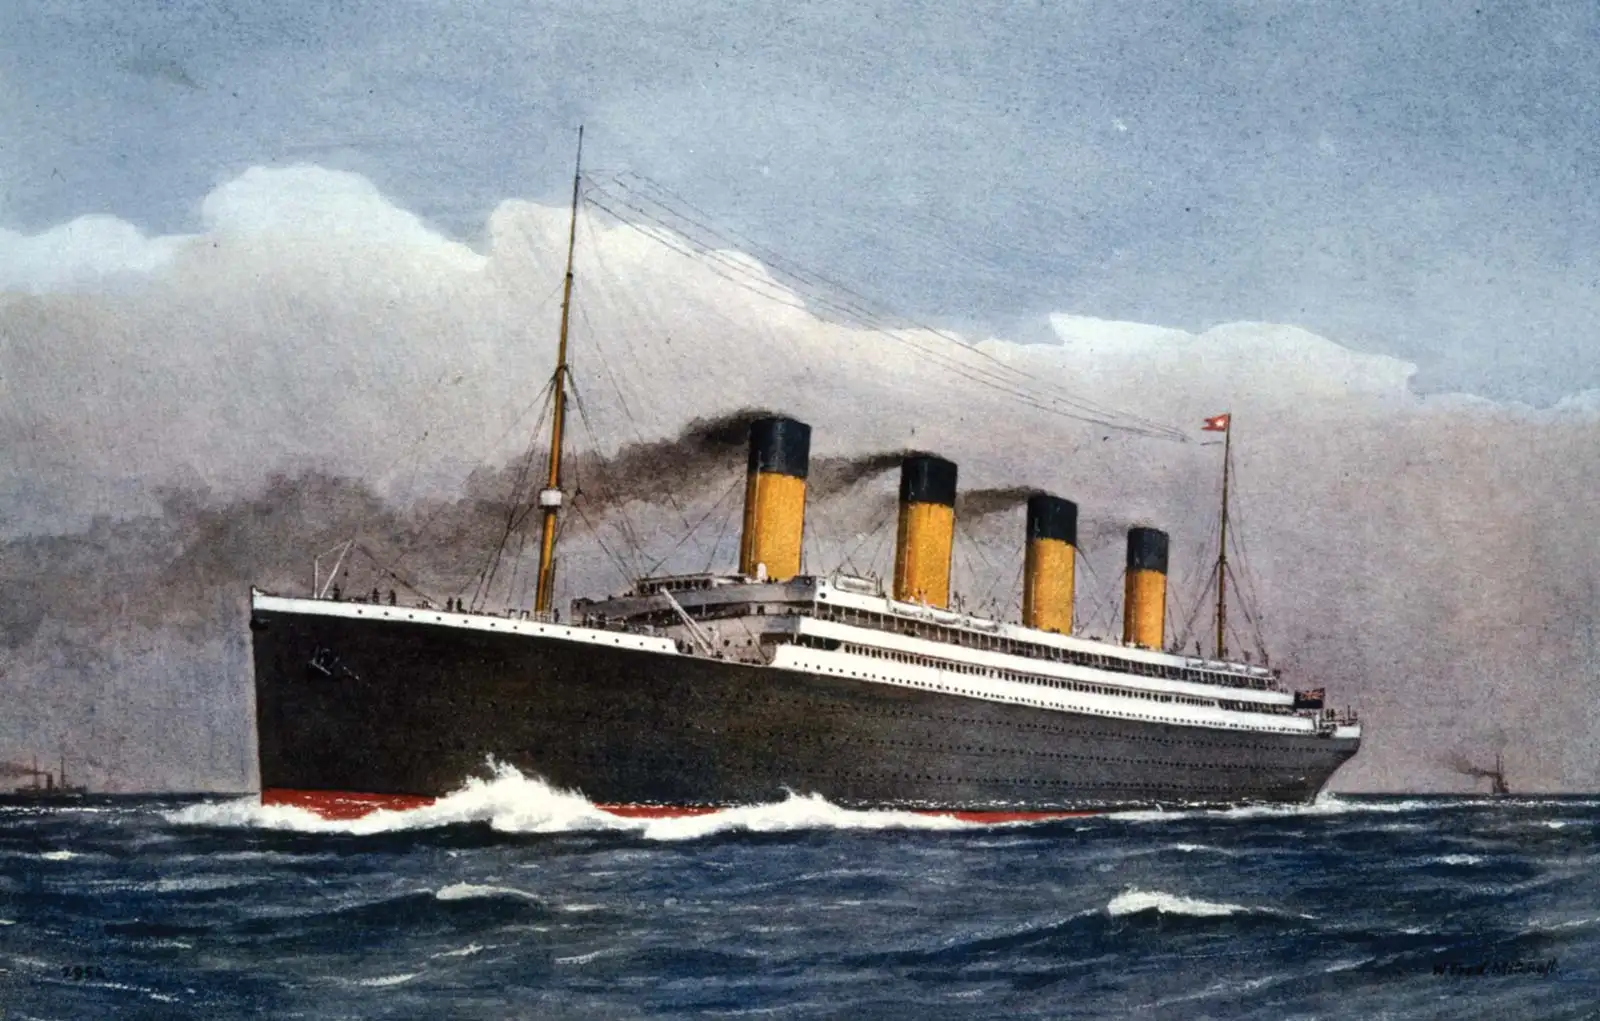

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
os.chdir('C:/Users/admin/Desktop/Project/Skill/Boosting/Houseloan-pridictKaggle')

In [2]:
#df = pd.read_csv("https://raw.githubusercontent.com/ingledarshan/upGrad_Darshan/main/titanic.csv")
df.shape

(891, 12)

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
print('Train ',train_data.shape)


Train  (891, 12)


In [4]:
y_train = train_data["Survived"]
train_data.drop(labels="Survived", axis=1, inplace=True)  
df = train_data.append(test_data)


In [5]:
df.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [3]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [6]:
df.isna().sum().sort_values(ascending=False)

Cabin          1014
Age             263
Embarked          2
Fare              1
Ticket            0
Parch             0
SibSp             0
Sex               0
Name              0
Pclass            0
PassengerId       0
dtype: int64

In [4]:
df.drop(['Cabin'],axis=1, inplace=True)
df.isna().sum().sort_values(ascending=False)

Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [448]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [449]:
df.Embarked.mode()[0]
df['Age'].mean()

29.69911764705882

In [450]:
df.Embarked.fillna(df.Embarked.mode()[0], inplace=True)
df.isna().sum().sort_values(ascending=False)

Age            177
Embarked         0
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [451]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

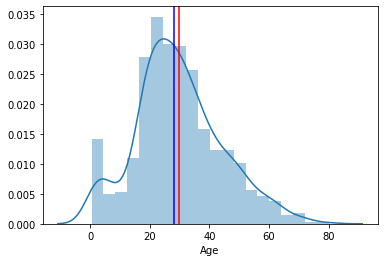

In [452]:
sns.distplot(df.Age)
plt.axvline(df.Age.mean(), color='r')
plt.axvline(df.Age.median(), color='b')
plt.show()

In [453]:
df.Age.mean()

29.69911764705882

In [454]:
df.Age.fillna(df.Age.mean(), inplace=True)
df.isna().sum().sort_values(ascending=False)

Embarked       0
Fare           0
Ticket         0
Parch          0
SibSp          0
Age            0
Sex            0
Name           0
Pclass         0
Survived       0
PassengerId    0
dtype: int64

# Feature Engineering

It is the process of deriving new column from the existing columns to get more insights from the dataset.

In [455]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [456]:
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [457]:
df.SibSp.value_counts(normalize=True)*100

0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: SibSp, dtype: float64

In [458]:
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [459]:
df.Parch.value_counts(normalize=True)*100

0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64

In [460]:
df['FamiliSize'] = df.SibSp + df.Parch + 1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamiliSize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [461]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamiliSize
132,133,0,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.000000,1,0,A/5. 3337,14.5000,S,2
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.000000,0,0,4134,9.5875,S,1
815,816,0,1,"Fry, Mr. Richard",male,29.699118,0,0,112058,0.0000,S,1
613,614,0,3,"Horgan, Mr. John",male,29.699118,0,0,370377,7.7500,Q,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.000000,0,0,113572,80.0000,S,1


In [462]:
df['GenderClass'] = df.apply(lambda x : 'child' if x['Age']<15 else x['Sex'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamiliSize,GenderClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,male


In [463]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamiliSize,GenderClass
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.000000,0,0,345364,6.2375,S,1,male
452,453,0,1,"Foreman, Mr. Benjamin Laventall",male,30.000000,0,0,113051,27.7500,C,1,male
659,660,0,1,"Newell, Mr. Arthur Webster",male,58.000000,0,2,35273,113.2750,C,3,male
611,612,0,3,"Jardin, Mr. Jose Neto",male,29.699118,0,0,SOTON/O.Q. 3101305,7.0500,S,1,male
617,618,0,3,"Lobb, Mrs. William Arthur (Cordelia K Stanlick)",female,26.000000,1,0,A/5. 3336,16.1000,S,2,female


In [464]:
df.shape

(891, 13)

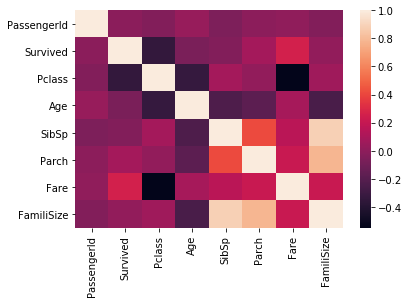

In [465]:
sns.heatmap(df.corr())
plt.show()

In [466]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'FamiliSize', 'GenderClass'],
      dtype='object')

In [467]:
df.drop(['Name', 'Sex','Ticket','PassengerId','SibSp','Parch'], axis=1, inplace=True)

In [468]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'Fare', 'Embarked', 'FamiliSize',
       'GenderClass'],
      dtype='object')

In [469]:
df.head()

,Survived,Pclass,Age,Fare,Embarked,FamiliSize,GenderClass
0,0,3,22.0,7.2500,S,2,male
1,1,1,38.0,71.2833,C,2,female
2,1,3,26.0,7.9250,S,1,female
3,1,1,35.0,53.1000,S,2,female
4,0,3,35.0,8.0500,S,1,male


# Dummification

It uses __One Hot Encoding Technique__.

It is achieved using the get_dummies() method of pandas.

https://stackoverflow.com/questions/50176096/removing-redundant-columns-when-using-get-dummies

In [470]:
df = pd.get_dummies(df, columns=['GenderClass','Embarked'], drop_first=True)
df.shape

(891, 9)

In [471]:
df.head()

,Survived,Pclass,Age,Fare,FamiliSize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,2,0,1,0,1
1,1,1,38.0,71.2833,2,1,0,0,0
2,1,3,26.0,7.9250,1,1,0,0,1
3,1,1,35.0,53.1000,2,1,0,0,1
4,0,3,35.0,8.0500,1,0,1,0,1


In [472]:
df.head()

,Survived,Pclass,Age,Fare,FamiliSize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,2,0,1,0,1
1,1,1,38.0,71.2833,2,1,0,0,0
2,1,3,26.0,7.9250,1,1,0,0,1
3,1,1,35.0,53.1000,2,1,0,0,1
4,0,3,35.0,8.0500,1,0,1,0,1


# Preparing X and y

In [473]:
X = df.loc[ : , df.columns != 'Survived' ]
X.head()

,Pclass,Age,Fare,FamiliSize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,3,22.0,7.2500,2,0,1,0,1
1,1,38.0,71.2833,2,1,0,0,0
2,3,26.0,7.9250,1,1,0,0,1
3,1,35.0,53.1000,2,1,0,0,1
4,3,35.0,8.0500,1,0,1,0,1


In [474]:
y = df.Survived

## Balance or imbalanced classifier 

In [475]:
y.value_counts()/y.count()*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [476]:
X.shape

(891, 8)

# Splitting X and y into Training and Testing datasets

In [477]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

In [478]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 8) (179, 8) (712,) (179,)


In [479]:
#df.describe()

In [480]:
numeric_cols = [ 'Age', 'Fare']
numeric_cols

['Age', 'Fare']

In [481]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
#sc = StandardScaler()
#sc = RobustScaler()
sc = MinMaxScaler()
X_train[['Age', 'Fare']] = sc.fit_transform(X_train[numeric_cols]) # study and give exam
X_test[['Age', 'Fare']] = sc.transform(X_test[numeric_cols]) # give exam (study is already over 
                                      # and the intelligence is stored in the object 'sc')

In [482]:
X_train.head()

,Pclass,Age,Fare,FamiliSize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
887,1,0.233476,0.114068,1,1,0,0,1
416,2,0.421965,0.123574,3,1,0,0,1
479,3,0.019854,0.046721,2,0,0,0,1
134,2,0.308872,0.049430,1,0,1,0,1
588,3,0.271174,0.030608,1,0,1,0,1


In [483]:
#sns.distplot(df.Age);

In [484]:
#sns.distplot(df.Fare);

# Logistic Regression

In [485]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train) # study

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [486]:
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Predictions

In [487]:
y_pred_train = logreg.predict(X_train) # exam on X_train
y_pred_test = logreg.predict(X_test) # exam on X_test

In [12]:
## Class weight
import numpy as np
a=np.array([10000])
print(a)
a/(2*np.bincount([1,2,1,1,1,2,1]))

[10000]


C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


array([  inf, 1000., 2500.])

### Accuracy recall precision : 
Here you go https://www.youtube.com/watch?v=HBi-P5j0Kec&t=638s

# Model Evaluation

In [488]:
# https://www.youtube.com/watch?v=HBi-P5j0Kec&t=638s

from sklearn.metrics import accuracy_score
print("Training Accuracy: ",accuracy_score(y_train, y_pred_train))
print("\n\nTesting Accuracy: ",accuracy_score(y_test, y_pred_test))

Training Accuracy:  0.8230337078651685


Testing Accuracy:  0.8379888268156425


In [489]:
from sklearn.metrics import confusion_matrix
print("Training confusion_matrix:\n",confusion_matrix(y_train, y_pred_train))
print("\n\nTesting confusion_matrix:\n",confusion_matrix(y_test, y_pred_test))

Training confusion_matrix:
 [[384  54]
 [ 72 202]]


Testing confusion_matrix:
 [[100  11]
 [ 18  50]]


In [490]:
train_Acc = (392+202) / (392+51+67+202)
train_Acc

0.8342696629213483

In [491]:
train_error = (51+67) / (392+51+67+202)
train_error

0.16573033707865167

In [492]:
train_Acc+train_error

1.0

In [493]:
1-train_Acc

0.1657303370786517

In [494]:
test_acc = (93+50) / (93+13+23+50)
test_acc

0.7988826815642458

In [495]:
from sklearn.metrics import precision_score
print("Training precision_score: ",precision_score(y_train, y_pred_train))
print("\n\nTesting precision_score: ",precision_score(y_test, y_pred_test))

Training precision_score:  0.7890625


Testing precision_score:  0.819672131147541


In [496]:
from sklearn.metrics import recall_score
print("Training recall_score: ",recall_score(y_train, y_pred_train))
print("\n\nTesting recall_score: ",recall_score(y_test, y_pred_test))

Training recall_score:  0.7372262773722628


Testing recall_score:  0.7352941176470589


In [497]:
from sklearn.metrics import f1_score
print("Training f1_score: ",f1_score(y_train, y_pred_train))
print("\n\nTesting f1_score: ",f1_score(y_test, y_pred_test))

Training f1_score:  0.7622641509433963


Testing f1_score:  0.7751937984496124


In [498]:
from sklearn.metrics import classification_report
print("Training classification_report:\n",classification_report(y_train, y_pred_train))
print("\n\nTesting classification_report:\n",classification_report(y_test, y_pred_test))

Training classification_report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       438
           1       0.79      0.74      0.76       274

    accuracy                           0.82       712
   macro avg       0.82      0.81      0.81       712
weighted avg       0.82      0.82      0.82       712



Testing classification_report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       111
           1       0.82      0.74      0.78        68

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179



In [499]:
logreg.predict(X_test)

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0], dtype=int64)

In [5]:
#logreg.predict_proba(X_test)

In [501]:
logreg.predict_proba(X_test)[:,1]

array([0.10057473, 0.12511946, 0.07339606, 0.08532928, 0.0772909 ,
       0.2792099 , 0.93704866, 0.25945455, 0.96235625, 0.06497727,
       0.1417265 , 0.4230872 , 0.08008931, 0.89030615, 0.09648574,
       0.8452432 , 0.06785975, 0.67806655, 0.0964867 , 0.20250698,
       0.0890437 , 0.70773346, 0.928708  , 0.70562449, 0.54585435,
       0.07729374, 0.43811053, 0.33056399, 0.09486957, 0.24242894,
       0.14326482, 0.89500566, 0.90368832, 0.10057473, 0.95755624,
       0.83610967, 0.22326139, 0.5102327 , 0.09486859, 0.08041393,
       0.18683291, 0.7989435 , 0.07998967, 0.19842374, 0.06498341,
       0.08203063, 0.87475616, 0.86642937, 0.38379753, 0.02867343,
       0.38997346, 0.77366267, 0.91644967, 0.05943904, 0.13275913,
       0.07339653, 0.27673475, 0.17846934, 0.12511942, 0.83521702,
       0.40914621, 0.23796855, 0.54446027, 0.12450562, 0.70773612,
       0.09979782, 0.0804193 , 0.11483627, 0.43121866, 0.21687797,
       0.85006656, 0.08041393, 0.85934139, 0.11563695, 0.70204

In [502]:
logreg.predict_proba(X_test)[:,1] > 0.75

array([False, False, False, False, False, False,  True, False,  True,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True,  True, False,  True,  True,
       False, False, False, False, False,  True, False, False, False,
       False,  True,  True, False, False, False,  True,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False,  True,  True, False,  True, False, False,
       False, False,  True, False,  True, False,  True, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False,  True, False,  True, False, False, False, False,  True,
       False, False,

In [503]:
preds1 = np.where(logreg.predict_proba(X_test)[:,1] > 0.75, 1, 0)
accuracy_score(y_test, preds1)

0.8212290502793296

In [504]:
preds1

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0])

In [505]:
preds2 = np.where(logreg.predict_proba(X_test)[:,1] > 0.25, 1, 0)
accuracy_score(y_test, preds2)

0.8212290502793296

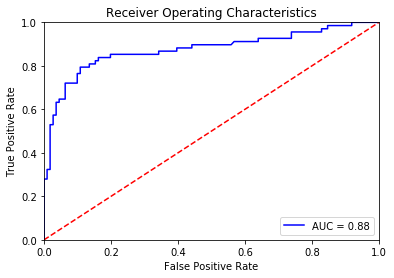

In [506]:
from sklearn.metrics import roc_curve, auc
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title("Receiver Operating Characteristics")
plt.plot(fpr, tpr, 'b', label= 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], "r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In this way, we achieve Logistic Regression model. More on it later. Try to create more Logistic models using Hyperparameters.

# Label Encoder

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [3]:
from sklearn.preprocessing import LabelEncoder,LabelBinarizer
le = LabelEncoder()
lb = LabelBinarizer()
le.fit(['setosa','versicolor','virginica','setosa','virginica','setosa']) # study
lb.fit(['setosa','versicolor','virginica','setosa','virginica','setosa']) # study

print("le.classes_:",le.classes_)
print("lb.classes_:",lb.classes_)
print(le.transform(['setosa','versicolor','virginica','setosa']))
print(lb.transform(['setosa','versicolor','virginica','setosa']))
#print(le.inverse_transform([0, 1, 2, 0]))

le.classes_: ['setosa' 'versicolor' 'virginica']
lb.classes_: ['setosa' 'versicolor' 'virginica']
[0 1 2 0]
[[1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]]
['setosa' 'versicolor' 'virginica' 'setosa']


In [1]:
from sklearn.preprocessing import LabelEncoder,LabelBinarizer
lb = LabelBinarizer()
lb.fit(['setosa','versicolor','virginica','setosa','virginica','setosa']) # study
print("lb.classes_:",lb.classes_)
print(lb.transform(['setosa','versicolor','virginica','setosa']))

lb.classes_: ['setosa' 'versicolor' 'virginica']
[[1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]]


In [508]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [509]:
taxis = sns.load_dataset("taxis")
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [510]:
taxis.pickup_borough.value_counts()

Manhattan    5268
Queens        657
Brooklyn      383
Bronx          99
Name: pickup_borough, dtype: int64

In [511]:
taxis.isna().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

In [512]:
taxis.pickup_borough.mode()[0]

'Manhattan'

In [513]:
taxis['pickup_borough'].fillna(taxis.pickup_borough.mode()[0], inplace=True)

In [514]:
taxis.isna().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough      0
dropoff_borough    45
dtype: int64

In [515]:
taxis.pickup_borough.value_counts()

Manhattan    5294
Queens        657
Brooklyn      383
Bronx          99
Name: pickup_borough, dtype: int64

In [516]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(taxis['pickup_borough'])
print(le.classes_)

['Bronx' 'Brooklyn' 'Manhattan' 'Queens']


In [517]:
taxis[['pickup_borough']] = le.transform(taxis['pickup_borough'])

In [518]:
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,2,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,2,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,2,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,2,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,2,Manhattan


In [519]:
taxis.pickup_borough.value_counts()

2    5294
3     657
1     383
0      99
Name: pickup_borough, dtype: int64

In [520]:
taxis.pickup_borough.value_counts()

2    5294
3     657
1     383
0      99
Name: pickup_borough, dtype: int64

In [521]:
poke_df = pd.read_csv("https://raw.githubusercontent.com/ingledarshan/upGrad_Darshan/main/Pokemon.csv")
poke_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,Gen 1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,Gen 1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,Gen 1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,Gen 1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,Gen 1,False


In [522]:
poke_df.Generation.value_counts()

Gen 1    166
Gen 5    165
Gen 3    160
Gen 4    121
Gen 2    106
Gen 6     82
Name: Generation, dtype: int64

## Task

Apply Label Encoding on the above columns. 

Time Given: (3mins)

# Label Binarizer

Try to learn about it yourself

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html

### Homework:

Read pokemon dataset again and apply LabelBinarizer on it.

# Logistic Regression for Multi-class Classification

In [6]:
from sklearn import datasets

In [88]:
iris = datasets.load_iris()
# https://www.google.com/url?sa=i&url=https%3A%2F%2Fmedium.com%2F%40pinnzonandres%2Firis-classification-with-svm-on-python-c1b6e833522c&psig=AOvVaw30gtKZUS2oyfi-XmSyuTdF&ust=1634140675508000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCLCHj8aexfMCFQAAAAAdAAAAABAD

In [525]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [526]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [92]:
y_dat=pd.DataFrame({'y':iris.target})

In [97]:
y_dat['y'].value_counts()

2    50
1    50
0    50
Name: y, dtype: int64

In [ ]:
iris.target_names

In [ ]:
#print(iris.DESCR)

In [ ]:
type(iris)

In [8]:
X = iris.data
y = iris.target

In [ ]:
#X

In [ ]:
y

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=85)

NameError: name 'train_test_split' is not defined

In [ ]:
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [ ]:
clf = LogisticRegression(random_state=0, multi_class='ovr') # ovr = One vs Rest

In [ ]:
model = clf.fit(X_std, y)

In [ ]:
# Unseen data

new_observation = [[.5,.5,.5,.5]]

In [ ]:
model.predict(new_observation)

In [ ]:
iris.target_names

In [ ]:
model.predict_proba(new_observation)

In [ ]:
y_pred = model.predict(X_std)

In [ ]:
accuracy_score(y, y_pred)

### The above iris dataset is not applied with TTS. Task is to apply TTS, Scale to fit_transform(X_train) and transform on X_test and specify the Train and Test Accuracy.

# Happy Learning

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=90)

In [84]:
#sc = StandardScaler()
sc = RobustScaler()
#sc = MinMaxScaler()
X_train = sc.fit_transform(X_train) # study and give exam
X_test = sc.transform(X_test)

In [85]:
clf = LogisticRegression(random_state=0, multi_class='ovr')
model = clf.fit(X_train, y_train)

In [86]:
y_pred_train = model.predict(X_train) # exam on X_train
y_pred_test = model.predict(X_test) # exam on X_test


In [87]:
print("Training Accuracy: ",accuracy_score(y_train, y_pred_train))
print("\n\nTesting Accuracy: ",accuracy_score(y_test, y_pred_test))

Training Accuracy:  0.9142857142857143


Testing Accuracy:  0.8888888888888888


In [4]:
import re

In [ ]:
txt = "abc"